In [8]:
import numpy as np
import scipy.stats as st
import sys
import matplotlib.pyplot as plt
sys.setrecursionlimit(100000)

Пусть Zn – количество частиц в n-м поколении ветвящегося процесса (ВП) Гальтона-Ватсона (Z0 = 1)
с геометрическим распределением (с параметром p) числа потомков.
Прежде чем решать задачи, полезно вспомнить (или разобраться), как по параметру p определить,
является ли процесс критическим, надкритическим или докритическим?

1. Оценить вероятность вырождения ВП по множеству симуляций и сравнить с точным ответом.

In [28]:
for p in [0.3,0.5,0.7]:
	number=0
	for i in range(10000):
		z=1
		for j in range(1000):
			z=st.geom.rvs(p,size=z,loc=-1).sum()
			if z==0:
				number+=1
				break
			if z>=1000:
				break
	print(p)
	print(min(-p/(p-1),1))
	print(number/10000)

0.3
0.4285714285714286
0.4352
0.5
1.0
0.9984
0.7
1
1.0


2. Смоделировать критический процесс 1000 раз до момента вырождения или до 50-го хода, отобрать
траектории, которые через 50 ходов еще жива, вывести их. Как их количество и численность
соответствующих процессов согласуется с предельной теоремой для ВП?

25


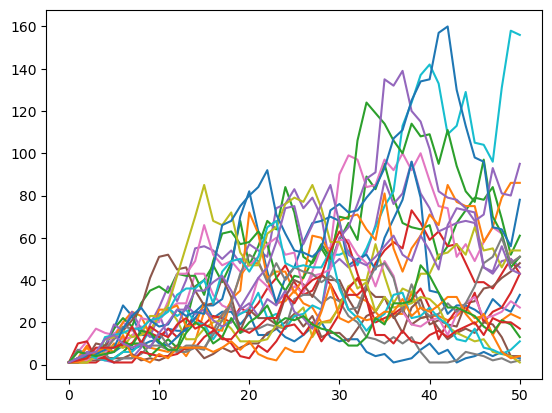

In [39]:
trajectories=[]
for i in range(1000):
	z=1
	trajectory=[1]
	for j in range(50):
		z=st.geom.rvs(p=0.5,size=z,loc=-1).sum()
		if z==0:
			break
		else:
			trajectory.append(z)
	if len(trajectory)==51:
		trajectories.append(trajectory)
x=np.arange(51)
for i in range(len(trajectories)):
	plt.plot(x,trajectories[i])
print(len(trajectories))
#variance=2
#P(Z_{50}>0)~2/(50*variance)~0.02 =>  таких траекторий должно быть ~20 штук

Сколько траекторий проживет 50 ходов в случае докритического процесса с геометрическ с p >
1/2? Моделировать процесс для различных p.

In [41]:
for p in [0.51,0.75,0.9]:
	trajectories=[]
	for i in range(1000):
		z=1
		trajectory=[1]
		for j in range(30):
			z=st.geom.rvs(p=p,size=z,loc=-1).sum()
			if z==0:
				break
			else:
				trajectory.append(z)
		if len(trajectory)==31:
			trajectories.append(trajectory)
	print(len(trajectories))
	print((1-p)**30/p**30)

11
0.301146013126064
0
4.8569357496188614e-15
0
2.3589824875925552e-29


3. Смоделировать 20 шагов надкритического процесса с p = 0.45 построить график log Zn от n.
Построить несколько траекторий таких процессов.

9
0.8181818181818181


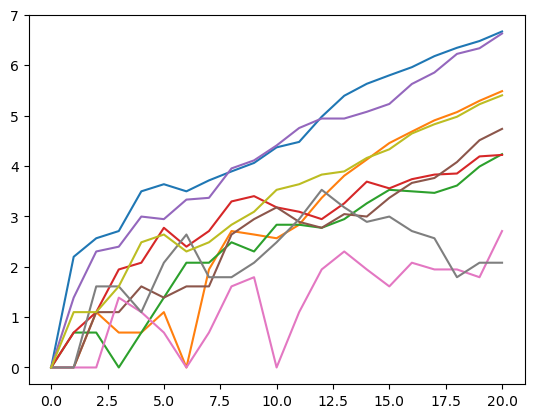

In [32]:
trajectories=[]
n=20
for i in range(50):
	z=1
	trajectory=[1]
	for j in range(n):
		z=st.geom.rvs(p=0.45,size=z,loc=-1).sum()
		if z==0:
			break
		else:
			trajectory.append(z)
	if len(trajectory)==n+1:
		trajectories.append(trajectory)
x=np.arange(n+1)
for i in range(len(trajectories)):
	plt.plot(x,[np.log(j) for j in trajectories[i]])
print(len(trajectories))
print(0.45/0.55)

4. Рассмотрим докритический ВП с иммиграцией в одну частицу. Найти численно вероятность того,
что в процессе k частиц в момент n, где k ≤ 5.

In [38]:
n=int(input())
p=float(input())
prob=np.zeros(6)
for i in range(1000):
	z=1
	for i in range(n):
		z=st.geom.rvs(p=p,size=z+1,loc=-1).sum()
	if z<=5:
		prob[z]+=1
print(p)
print(prob/1000)

0.7
[0.555 0.272 0.11  0.038 0.015 0.009]
